- In machine learning the most important part in solving our problem is choosing the right estimator for our data. 

- We have several estimators such as: classification , clustering, dimensionality reduction and regression.

- In this notebook we will explore when we will use the regression as an estimator for our data, and will explore different models of regression.

For solving our problem with regression we need to take care of folowing requirements:

1. **More than 50 samples:** Our data must have more than 50 samples, if we donot have that much data then we should get more data for our regresion analysis.
2. **Predicting Quantity:** We are interested in predicitng a quantity of data. For example, in the tips dataset if we want to predict the tip amount based on the total bill.

If our problem satisfies the above two conditions then regression is best fit for our model.

# **Regression models in sklearn**
We have several regression models in sklearn which are as follows:

**1. SGD Regressor**

**2. Lasso**

**3. Elastic Net**

**4. SVR(kernel = 'rbf')**

**5. Ensemble Regressors**

**6. Ridge Regression**

**7. SVR(kernel = 'linear')**

After selecting regression for solving our problem the next step is to choose which model should be selected from the above models.

- **More than 100K Samples:** If we have more than 100,000 samples in our data then we should use SGD Regressor. SGD processes one or a few training examples at a time, making it memory-efficient. This is crucial for large datasets that may not fit into memory when using other regression algorithms.

- **Less than 100K Samples:** But if our samples are less than 10,000 then see if few features should be important or not.
    - **Few Features should be important:**
        - If Yes, then consider using Lasso or ElasticNet regression. Both methods are useful when you expect only a few features to be significant. Lasso performs feature selection by shrinking some coefficients to zero, while ElasticNet combines L1 and L2 regularization.
    
        - If no, It directs you to use Ridge Regression or SVR (Support Vector Regression) with a linear kernel. Ridge Regression is effective when all features contribute somewhat equally, and SVR with a linear kernel can capture linear relationships.
    - **Ensembel Regressors and SVR(kernel='rbf') not working:** If these methods are not working, it suggests trying SVR with an RBF (Radial Basis Function) kernel or Ensemble Regressors. The RBF kernel in SVR can capture non-linear relationships, and ensemble methods (like Random Forest, Gradient Boosting) can handle complex patterns in data.
    
Now we will discuss all the above models one by one.

---
# **1. SGD Regressor**

Before moving to the stochastic gradient descent first we have to under stand what is Stochastic Gradient Descent.

## **Stochastic Gradient Descent (SGD)**  
- SGD is an optimization technique in deep learning and machine learning for training models. 
- SGD changes the model's parameters after each iteration using a classic gradient descent method, which calculate the the gradient off los function by taking in account whole dataset.
- By iteratively changing the model’s parameters in the direction of the negative gradient, SGD seeks to minimize the cost or loss function.
    
## **SGD Regressor**
- SGD is responsible for supervised learning in which it predicts the output variable from one or more input data. 
- SGD Regressor minimizes the loss by minimizing the discrepency between target values and anticipated values by optimizing model's parameters.

### **Importance of SGD Regressor**
- Can handle big datasets and is computationally efficient.
- Can learn online, update the model as soon as new fresh data is available. Best for real-time data.
- It is appropriate for distributed computing systems since it may be parallelized.

### **Working**
The basic algorithm behind the SGD Regressor algorithm is as follows:
- **Initializtion:** Initialize model parameters, probably with small values.
- **Loss Function:** The algorithm implements some loss function to minimize the loss which quantifies the difference between the model’s predictions and the actual target values.
- **Gradient Calculation:** Calculate gradient of the loss with respect to the model parameters.
- **Parameters Updation:** After computing the gradient , update the parameters of the algorithm.
- **Iterate:** The above steps(4 – 5) are done for multiple data points and each iteration is called epoch.
- **Converge:** This continues until a stopping criteria is met like maxima / minima.

#### **Implementation of Stochastic Gradient Descent Regressor using California Dataset**

First we need to import all the required libraries. Some of he new moduls used are described below:
1. `SGDRegressor` from `sklearn.linear_model`:To create and train a linear regression model using stochastic gradient descent.

2. `train_test_split` from `sklearn.model_selection`:To split data into training and testing sets, ensuring that the model can be evaluated on unseen data.

3. `StandardScaler` from `sklearn.preprocessing`: To standardize the dataset’s features so that they have a mean of 0 and a standard deviation of 1.
4. ` mean_squared_error` from `sklearn.metrics`: To measure the average squared difference between actual and predicted values, indicating the model's prediction error.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
import pandas as pd
df = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')
df.dropna(inplace= True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#### **Define features and targets**
From the above dataset we need to set our feature variables and target variables. In the dataset the target variable is `median_house_value` while rest of the columns are feature columns.

In [5]:
# Define features and target
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
target = 'median_house_value'

In [6]:
# Features
X = df[features]

#Target
y = df[target]

#### **Split the Data**
- Now we have to split our data into training and testing using the train test split function from sklearn. 

- The SGD Regressor will optimize the parameters using the train set and will evaluate the model using test set.

- Here we are using 80 percent of our data for training and remaining 20 percent for the testing phase.

- I am setting the random state = 42. Setting random_state to a specific value ensures that the function produces the same split every time you run your code.

In [7]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### **Create Instance of SGD Regressor**
Now we create the object of SGD Regressor and laso initialize all the important parameters.

- The model will iterate up to 1000 times over the training data.
- The regularization term `alpha`, also known as the penalty, which helps to prevent overfitting by adding a penalty to the loss function. In this case, alpha=0.0001 is a typical default value.
- The `learning rate` schedule. The `invscaling` option means that the learning rate will decrease as the number of iterations increases. Some other learning rate options are:
    1. `constant:` The learning rate remains the same throughout the training process.
    2. `optimal:` The learning rate is set using an adaptive formula based on the iteration count. 
    3. `adaptive:` The learning rate remains constant to eta0 as long as the training loss keeps decreasing. Once the loss stops decreasing, the learning rate is divided by 5.
  We can also initialize the starting learnirng using the parameter `eta0`. By defualt it is 0.01 so for now we will keep it as it is.

- A fixed random seed (42) for reproducibility.

In [8]:
sgd_regressor = SGDRegressor(
    max_iter = 1000,
    alpha = 0.01,
    learning_rate='invscaling',
    random_state = 42
)

#### **Fit the training data and Predict using test data**
The code will train the model using the training data.
After the training it will predict the calculated target values for the testing set to make predictions.

In [9]:
sgd_regressor.fit(X_train, y_train)
y_pred = sgd_regressor.predict(X_test)

#### **Model Evaluation**

In [11]:
mse = mean_squared_error(y_test, y_pred)
print(f"The mean squared error is: {mse}")


The mean squared error is: 3.4985530035954654e+30


#### **Get the optimized parameters**

In [12]:
# Get the optimized parameters
coef = sgd_regressor.coef_
intercept = sgd_regressor.intercept_

print("Optimized coefficients (weights):", coef)
print("Optimized intercept (bias):", intercept)


Optimized coefficients (weights): [ 1.28135054e+11  2.75732335e+11 -1.11523886e+11 -2.44628348e+10
 -4.58418736e+11 -9.74609096e+11  5.18899750e+11 -4.59056233e+11]
Optimized intercept (bias): [-2.44811589e+10]


---
# **2. Lasso Regression**
Lasso stands for Least Absolute Shrinkage and Selection Operate and it is often called L1 Regularization. 

It is a linear regression technique that incorporates regularization to improve model performance and prevent overfitting.

### **Importance of Lasso**
- Performs automatic feature selection by driving some features' coefficient to zero. It is important when all the features in our dataset are not important and we want to use only the important ones.
- Regularization helps in preventing overfitting by adding a penalty for large coefficients.

### **Working**
- **Regularization:** Lasso adds a penalty equal to the absolute value of the magnitude of coefficients. The regularization term is added to the cost function, which helps in shrinking some coefficients to zero, effectively performing feature selection.

- **Cost Function:** The objective function is:

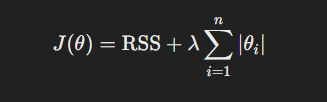

Where,
**RSS** is the residual sum of squares (sum of squared errors between predicted and actual values).

**𝜆** is the regularization parameter (also known as alpha in scikit-learn).

**𝜃𝑖** are the coefficients of the model.

- **Shrinkage and Selection:** By adjusting 𝜆, Lasso can shrink some coefficients exactly to zero, which means it can be used for feature selection. This results in a more interpretable model with fewer features.

#### **Implementation of Stochastic Gradient Descent Regressor using California Dataset**

First we need to import all the required libraries. Some of he new moduls used are described below:

`Lasso` from `sklearn.linear_model`:To create and train a regression model using Lasso.

All other module has already been imported before so we wil lnot import them again.

In [13]:
from sklearn.linear_model import Lasso

We wll be using the same california housing dataset we did before.

First we will scale our data using the StandardScaler.

Now we define our Lasso model's object. An do the training of our data.

In [14]:
lasso = Lasso(max_iter=1000)
lasso.fit(X_train, y_train)

Lasso()

In [15]:
y_pred = lasso.predict(X_test)

Now let's check the mean absolute error and R2 score of our model.

In [16]:
mean_absolute_error(y_test, y_pred)

51372.65322569805

In [19]:
from sklearn.metrics import r2_score

# Calculate R2 Score
r2 = r2_score(y_test, y_pred)

print("R² Score:", r2)

R² Score: 0.6400862985932623


As we can see that the mean absolute error is very high. We can adjust it with the help of hyperparameters. We can use Grid Search to choose the best parameters among the given parameters.

In [20]:
param_grid = { 
'alpha' : [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
'tol' : [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
'max_iter' : [1000, 10000, 100000, 1000000, 10000000]
}

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
lasso_cv = GridSearchCV(Lasso(), param_grid, cv = 3, n_jobs = -1)

In [23]:
lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                   1000],
                         'max_iter': [1000, 10000, 100000, 1000000, 10000000],
                         'tol': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                 1000]})

In [24]:
y_pred_cv = lasso_cv.predict(X_test)

In [25]:
mean_absolute_error(y_test, y_pred_cv)
# Calculate R2 Score
r2 = r2_score(y_test, y_pred_cv)

print("R² Score:", r2)

R² Score: 0.640083821559603


---
# **3. Elastic Net**
Elastic Net Regression is a linear regression model that combines the penalties of Lasso and Ridge regression. It is particularly useful when dealing with datasets where there are multiple correlated features.

### **Working**
**Linear Regression Base:** Elastic Net starts with a basic linear regression model, where the goal is to fit a line that minimizes the mean squared error (MSE) between predicted and actual values.

**Regularization:**
    - Lasso Penalty: Encourages sparsity in the model by shrinking some coefficients to zero, effectively selecting a subset of features.
    - Ridge Penalty: Adds a penalty proportional to the square of the magnitude of coefficients, which discourages large coefficients but keeps all features in the model. 

**Combination of Penalties:** Elastic Net combines these penalties using two parameters:
   - `alpha` controls the overall strength of the regularization.
   - `l1_ratio` (between 0 and 1) determines the balance between L1 (Lasso) and L2 (Ridge) penalties.
      - `l1_ratio = 1` results in Lasso regularization only.
      - `l1_ratio = 0` results in Ridge regularization only.
      - Values between 0 and 1 provide a mix of both.

#### **Generate Synthetic Data**
For the demontration of Elastic Net Regression, I am using a custom dataset in which y is the target variable while other columns are the features.

In [28]:
# Generate synthetic data
X = np.array(10 * np.random.randn(10000, 5))
df = pd.DataFrame(X, columns=['Feature' + str(l) for l in range(1, 6)])
df['y'] = df['Feature1'] + df['Feature2'] + 0.1 * df['Feature3'] \
          + 2 * df['Feature4'] * df['Feature5'] + 0.1 * df['Feature5'] \
          + 3 * np.random.normal(loc=5, scale=2)
df.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,y
0,-5.300579,-12.765318,-8.357713,7.422211,-6.013427,-95.476774
1,-3.144893,-23.102443,-0.777502,-2.139989,-29.142542,108.782164
2,-4.102446,1.106179,20.651810,13.648622,6.775466,197.990104
3,4.466820,2.683304,-4.741976,-8.380352,-15.884238,284.610575
4,11.990650,-15.500277,8.087609,-11.679211,-1.193763,38.356255


#### **Prepare Data**

The features and target variable are separated. The dataset is then split into training and test sets, with 20% of the data reserved for testing. This split ensures that the model can be evaluated on unseen data.


In [40]:
from sklearn.datasets import make_regression

X, y = make_regression(n_features = 2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


#### **Scale the Data**

This segment standardizes the feature values to have a mean of 0 and a standard deviation of 1. Scaling is important for models like ElasticNet, which can be sensitive to the scale of features.


In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### **Initialize and Tune ElasticNet Model**

Here, an ElasticNet regression model is initialized. A parameter grid is defined to find the best values for `alpha` and `l1_ratio`, which control the regularization strength and the balance between Lasso and Ridge penalties. `GridSearchCV` is used to perform an exhaustive search over these hyperparameters.


In [38]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Initialize ElasticNet model
elastic_net = ElasticNet(max_iter=1000)

# Define parameter grid for GridSearchCV
param_grid = {
    'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0, 0.1, 0.5, 0.7, 1]
}

# Initialize GridSearchCV
elastic_net_cv = GridSearchCV(elastic_net, param_grid, cv=3, n_jobs=-1)


### **Fit the Model and Evaluate**

The ElasticNet model is trained using the best parameters found through `GridSearchCV`. Predictions are made on the test set, and the Mean Absolute Error (MAE) of the model is calculated to evaluate its performance. The MAE provides an indication of the average absolute error between the predicted and actual values.


In [41]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress specific warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Fit the model
elastic_net_cv.fit(X_train_scaled, y_train)


# Predict with the best model
y_pred_cv = elastic_net_cv.predict(X_test_scaled)


mae_cv = mean_absolute_error(y_test, y_pred_cv)
print("Mean Absolute Error with tuned model:", mae_cv)

r2_cv = r2_score(y_test, y_pred_cv)

print("R² Score:", r2_cv)

Mean Absolute Error with tuned model: 95.57061395851632
R² Score: -0.09385558132337812


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.508e+05, tolerance: 5.032e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.011e+05, tolerance: 6.356e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

With a Mean Absolute Error with tuned model: 95.57061395851632 and 
R² Score: -0.09385558132337812, it suggests that your model's performance is relatively good.

---
# **4. Ridge Regression**
- Ridge regression or Tikhonov regularization is the regularization technique that performs L2 regularization.
- It modifies the loss function by adding the penalty (shrinkage quantity) equivalent to the square of the magnitude of coefficients.

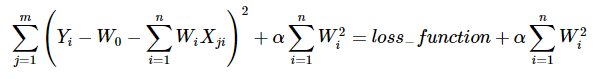

In the above loss function, alpha is the parameter we need to select. A low alpha value can lead to over-fitting, whereas a high alpha value can lead to under-fitting.

Now let's try ridge regression on the regression dataset.

#### **Import Data**

In [43]:
from sklearn.datasets import make_regression

In [44]:
X, y = make_regression(n_samples = 10000, n_features = 5, noise = 1, random_state = 42)

In [46]:
X

array([[ 0.01598377, -0.25042722, -0.19678183, -1.53218242,  0.51152567],
       [ 0.82482016, -1.18387309,  0.4974288 ,  0.213996  ,  2.29221164],
       [-1.56024198,  1.85466213, -0.05435127, -0.91702803,  1.13129905],
       ...,
       [ 0.68631481, -0.22656428, -1.67989924, -0.83452965, -1.07317939],
       [-0.85001969,  0.36973314, -0.45574331,  0.04832675, -0.56911204],
       [ 0.60402485, -1.65990556, -0.28413955,  0.52756812,  0.08882296]])

In [47]:
y

array([-77.4234305 , -15.75142868,   4.05779163, ...,   3.8410735 ,
       -42.94965725, -80.44175218])

#### **Data Split**

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### **Data Standardization**

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#### **Model Selection**

In [51]:
from sklearn.linear_model import Ridge

In [52]:
ridge = Ridge()

In [53]:
ridge.fit(X_train_scaled , y_train)

Ridge()

In [54]:
y_pred = ridge.predict(X_test_scaled)

In [55]:
mean_absolute_error(y_test, y_pred)

3.2825001904900533

In [56]:
mean_squared_error(y_test, y_pred)

16.562804964698646

In [57]:
r2_score(y_test, y_pred)

0.9991581389203057

The r2 score of 0.99 means that our model is trained good and is perorming well or the testing data. We can also adda parameter grid to improve the results more and see waht happens.

---
# **5. Support Vector Regression(SVR)**
Support vector regression (SVR) is a type of support vector machine (SVM) that is used for regression tasks. It tries to find a function that best predicts the continuous output value for a given input value.

SVR can use both linear and non-linear kernels. 
- A linear kernel is a simple dot product between two input vectors.
- A non-linear kernel is a more complex function that can capture more intricate patterns in the data. 
The choice of kernel depends on the data’s characteristics and the task’s complexity.

In scikit-learn package for Python, you can use the `SVR` class to perform SVR with a linear or non-linear `kernel`. To specify the kernel, you can set the kernel parameter to `linear` or `RBF` (radial basis function).


There are several concepts related to support vector regression (SVR) that you may want to understand in order to use it effectively. Here are a few of the most important ones:

**Support vector machines (SVMs):** SVMs try to find the hyperplane in a high-dimensional space that maximally separates different classes or output values.
**Kernels:** Functions that determine the similarity between input vectors.  A linear kernel is a simple dot product between two input vectors, while a non-linear kernel is a more complex function that can capture more intricate patterns in the data.
**Hyperparameters:** The hyper parameters in SVR are:
1. `kernel` Functions that determine the similarity between input vectors. 
2. `degree` Degree of the polynomial kernel function (‘poly’). Must be non-negative. Ignored by all other kernels
3. `gamma` Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
    if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,

    if ‘auto’, uses 1 / n_features

    if float, must be non-negative.
4. `tol` Tolerance for stopping criterion.
5. `C` Regularization parameter.
6. `max_iter` Hard limit on iterations within solver, or -1 for no limit.

In [66]:
from sklearn.svm import SVR

### **Fitting an SVR Model on the Cosine Curve data using Linear Kernel**

#### **Generate Sample Data**

In [64]:
X = np.sort(5 * np.random.rand(1000, 1), axis=0)
y = np.cos(X).ravel()

# Add noise to targets
y[::5] += 4 * (0.5 - np.random.rand(200))

#### **Fit regression model**

In [67]:
svr_lin = SVR(kernel="linear")

In [71]:
svr_lin.fit(X, y)
y_pred = svr_lin.predict(X)

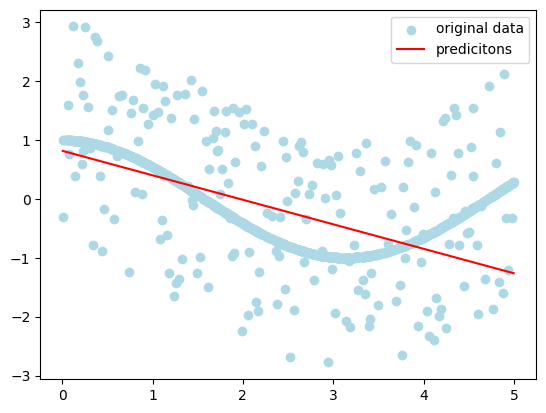

In [73]:
plt.scatter(X, y, color = 'lightblue', label = 'original data')
plt.plot(X, y_pred, color = 'red', label = 'predicitons')
plt.legend()
plt.show()

As we can see the linear kernel fits a linear regression curve for predicting the data.

### **Fitting an SVR Model on the Cosine Curve data using Polynomial Kernel**

For fitting the model using polynomial curve we will use thee above smae code instead the kernel willn ow be changed to `poly`

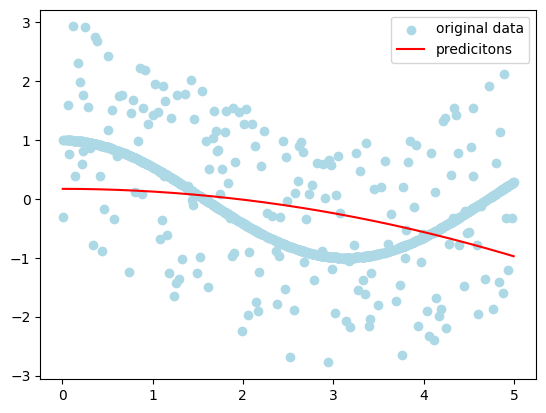

In [79]:
svr_lin = SVR(kernel = "poly", degree = 2)
svr_lin.fit(X, y)
y_pred = svr_lin.predict(X)
plt.scatter(X, y, color = 'lightblue', label = 'original data')
plt.plot(X, y_pred, color = 'red', label = 'predicitons')
plt.legend()
plt.show()

### **Fitting an SVR Model on the Cosine Curve data using RBF Kernel**
For fitting the model using polynomial curve we will use thee above smae code instead the kernel willn ow be changed to `rbf`

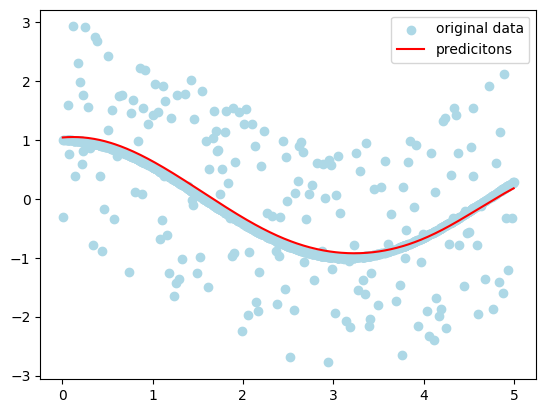

In [80]:
svr_lin = SVR(kernel = "rbf")
svr_lin.fit(X, y)
y_pred = svr_lin.predict(X)
plt.scatter(X, y, color = 'lightblue', label = 'original data')
plt.plot(X, y_pred, color = 'red', label = 'predicitons')
plt.legend()
plt.show()

From the above three kernels we can clearly see that the rbf kernel is best for our predictions. For selecting the kernels we need to see the model's complexity and data variety.

---
# **6. Ensemble Regressor**
Ensemble regressors in scikit-learn are methods that combine the predictions of multiple base estimators to improve the robustness and accuracy of the final prediction. The idea is that a group of weak learners can come together to form a strong learner. Scikit-learn provides several ensemble methods for regression:
1. Random Forest Regressor
2. Gradient Boosting Regressor
3. AdaBoost Regressor
4. Voting Regressor


## **Random Forest Regression**

- Random Forest Regression in machine learning is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging. 

- The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees. 

For demonstration of Random Forest Regression I am using a Healh expectancy dataset.

In [87]:
health_exp = pd.read_csv('/kaggle/input/healthexp/healthexp.csv')
health_exp.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


Now let's do encoding of our Categorical data.

In [88]:
health_exp = pd.get_dummies(health_exp)

In [89]:
health_exp.head()

,Year,Spending_USD,Life_Expectancy,Country_Canada,Country_France,Country_Germany,Country_Great Britain,Country_Japan,Country_USA
0,1970,252.311,70.6,False,False,True,False,False,False
1,1970,192.143,72.2,False,True,False,False,False,False
2,1970,123.993,71.9,False,False,False,True,False,False
3,1970,150.437,72.0,False,False,False,False,True,False
4,1970,326.961,70.9,False,False,False,False,False,True


Now we define our feature ad target columns here the target column is Life expectancy.

In [90]:
# Feature column
X = health_exp.drop(columns = 'Life_Expectancy', axis = 1)

In [95]:
y = health_exp['Life_Expectancy']

#### **Train Test Split**

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### **Model Selection**

In [105]:
from sklearn.ensemble import RandomForestRegressor

In [106]:
random_forest = RandomForestRegressor(n_estimators=10, random_state = 42, oob_score = True)

#### **Fit the model**

In [107]:
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

#### **Model Evaluation**

In [109]:

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 0.1602527272727276
R-squared: 0.9868737639097386


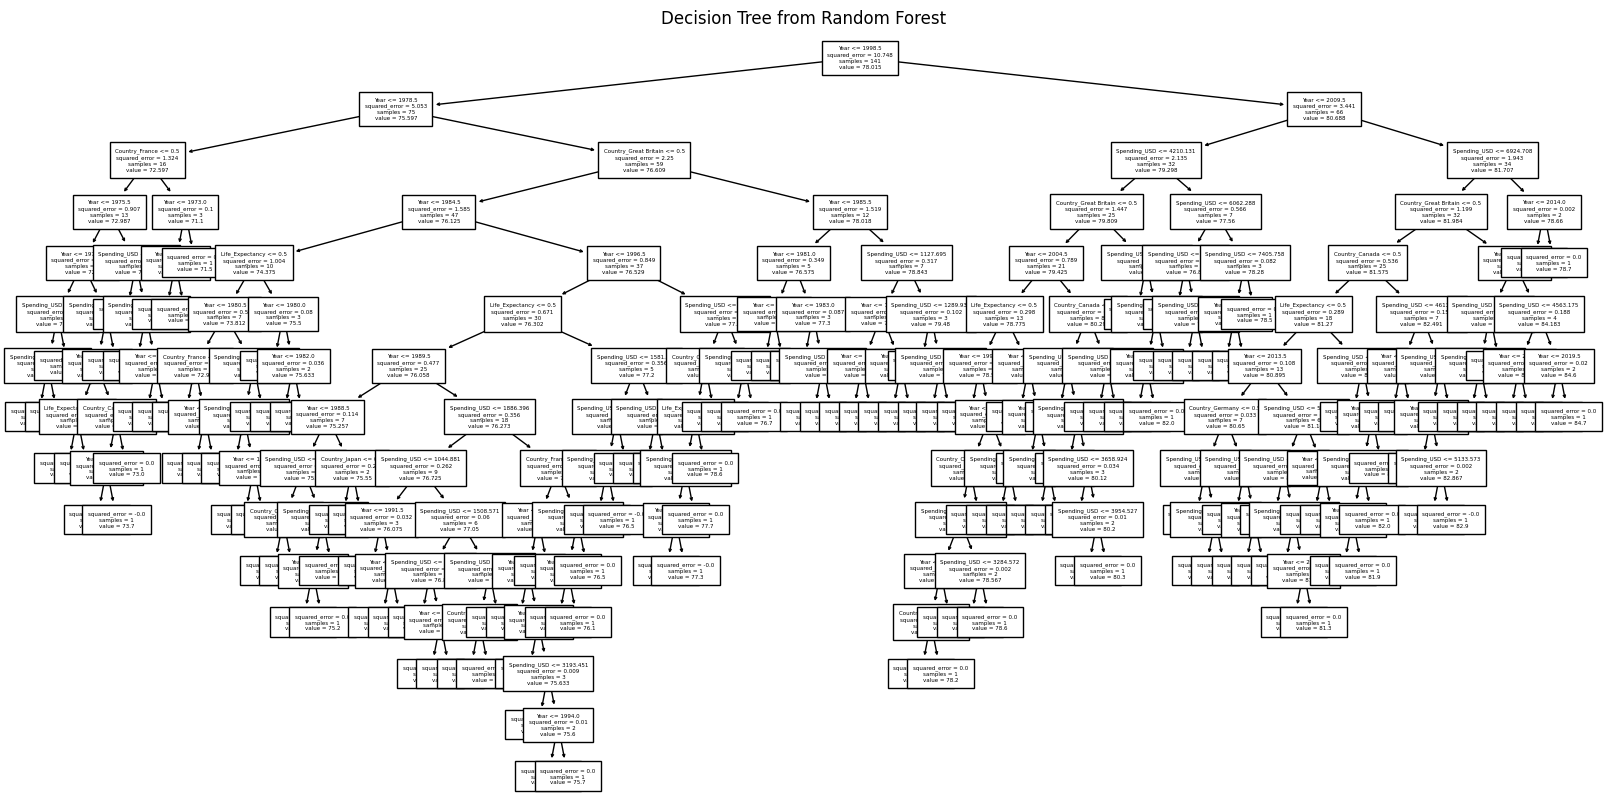

In [121]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
 
# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = random_forest.estimators_[0]
 
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=health_exp.columns.tolist(), fontsize = 4)
plt.title("Decision Tree from Random Forest")
plt.show()

Although the above decision tree looks a bit messy. It is a basic intuition that we can visualize a decision tree for our data to understand the model.

**Applications of Random Forest Regression**
The Random forest regression has a wide range of real-world problems, including:
- Predicting continuous numerical values: Predicting house prices, stock prices, or customer lifetime value.
- Identifying risk factors: Detecting risk factors for diseases, financial crises, or other negative events.
- Handling high-dimensional data: Analyzing datasets with a large number of input features.
- Capturing complex relationships: Modeling complex relationships between input features and the target variable.


## **Gradient Boosting Regressor**
Gradient Boosting is a powerful boosting algorithm that combines several weak learners into strong learners, in which each new model is trained to minimize the loss function such as mean squared error or cross-entropy of the previous model using gradient descent. 

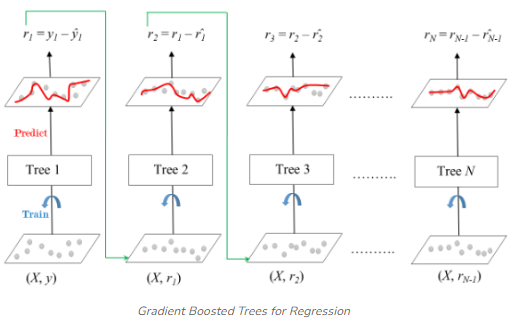

Each tree predicts a label and the final prediction is given by the formula

y(pred) = y1 + (eta *  r1) + (eta * r2) + ....... + (eta * rN)


### **Algorithm:**
1. Initialize the model with a constant value
Set the initial prediction 𝑦^𝑖(0) for all 𝑖 to the mean of the target values 𝑦

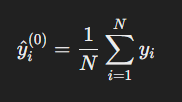

where 𝑁 is the number of training examples.

2. Iterate for 𝑚 stages (boosting rounds)
    - Compute the pseudo-residuals
    - Fit a weak learner (base regressor)
    - Update the model
3. Make Final Predictions
After 𝑀 iterations, the final prediction 𝑦^𝑖 for each data point 𝑖 is given by:

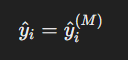

In [123]:
from sklearn.datasets import load_diabetes

# Importing the dataset 
X, y = load_diabetes(return_X_y=True)

In [128]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

After splitting the data into trin and test sets we will now instantiate the Gradient Boosting Regressor with initializing its parameters also. The parameters used are described below:
1. `loss`
The loss function to be optimized. Can be `squared_error`, `absolute_error`, `huber`, `quantile`
2. `learning_rate`
The learning rate shrinks the contribution of each tree by this value. 
3. `n_estimators`
The number of boosting stages (trees) to be run. 
4. `max_depth`
The maximum depth of the individual regression estimators. Limiting the depth of the trees helps to prevent overfitting.
5. `random_state`
Controls the random number generator used in the estimator. Ensures reproducibility of results.
6. `max_features`
The number of features to consider when looking for the best split. Helps to reduce variance by introducing randomness. Can be: integer, float, `auto`(Uses all features), `sqrt`(Uses sqrt(n_features)), `log2`(Uses log2(n_features)), `None`(Uses all features)

In [129]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate Gradient Boosting Regressor
gbr = GradientBoostingRegressor(loss='absolute_error',
                                learning_rate=0.1,
                                n_estimators=300,
                                max_depth = 1, 
                                random_state = 42,
                                max_features = 5)

In [130]:
# Fit to training set
gbr.fit(X_train, y_train)
 
# Predict on test set
y_pred = gbr.predict(X_test)
 
# test set RMSE
rmse = mean_squared_error(y_test, y_pred) ** (1 / 2)
 
# Print rmse
print('Root mean Square error: {:.2f}'.format(rmse))
r2_score(y_test, y_pred)

Root mean Square error: 52.12


0.4871875970490863

## **AdaBoost Regressor**
An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction. As such, subsequent regressors focus more on difficult cases.

The AdaBoostRegressor in sklearn is an ensemble learning method that combines multiple weak learners (usually decision trees) to create a strong predictive model. Here’s a detailed description of the AdaBoostRegressor, including its parameters and their possible values.

### **Parameters**
1. `base_estimator`
The base estimator from which the boosted ensemble is built.
Any object that implements the fit and predict methods. 

2. `n_estimators`
The maximum number of estimators at which boosting is terminated.
3. `learning_rate`
Weight applied to each regressor at each boosting iteration. A higher learning rate increases the contribution of each regressor.

4. `loss`
The loss function to use when updating the weights after each boosting iteration.

Options:
`linear` (default): Linear loss
`square`: Square loss
`exponential`: Exponential loss
5. `random_state`

Let's apply the Ada boost regressor on the same dataset as above

In [154]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=0)

In [156]:
y_pred = regr.predict(X_test)
r2_score(y_test, y_pred)

0.4448191552666114

In [157]:
# test set RMSE
rmse = mean_squared_error(y_test, y_pred) ** (1 / 2)
 
# Print rmse
print('Root mean Square error: {:.2f}'.format(rmse))

Root mean Square error: 54.23


## **Voting Regressor**
A voting regressor can be defined as a special method that combines or ‘ensembles’ multiple regression models and overperforms the individual models present as its estimators.

Some key facts about it are discussed below:
1. Diverse Models
It’s required to include diverse regression(like traditional ML models along with some other ensemble tree-based models) models in the ensemble.
2. Simple Averaging vs. Weighted Averaging
The Voting regressor can use simple averaging in which equal weights are assigned for all models or weighted averaging where different weights are assigned to each model’s prediction. 
3. Training and Prediction
The individual models are trained on the training data and during prediction, each model provides its own prediction which are then combined using the specified aggregation method (averaging) to form the final ensemble prediction. 
4. Performance Improvement
The Voting Regressor is often used when we have several candidate models and want to improve overall prediction accuracy by smoothing out the noise introduced by each individual models and provide more stable and accurate predictions.

### **Step by Step Implementation**
**Importing required libraries**

In [188]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor, RandomForestRegressor

**Dataset loading and splitting**

In [189]:
#Load Boston Housing Dataset
df = pd.read_csv('/kaggle/input/boston-housing/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [190]:
X = df.drop(columns = 'medv', axis = 1)
y = df['medv']

In [191]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**Exploratory Data Analysis**

Exploratory Data Analysis or EDA helps us to gain deeper insights about the behavior of the dataset.

Visualizing distribution of variable for regression dataset helps us to know the nature of the target or any outlier is present or not.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


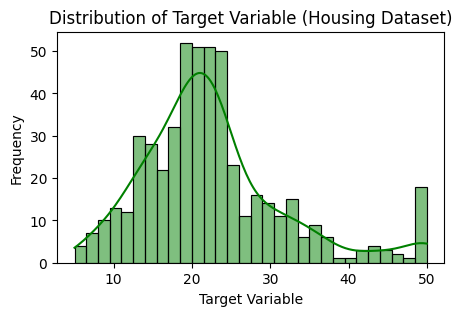

In [192]:
# Create a histogram of the target variable
plt.figure(figsize=(5, 3))
sns.histplot(y, kde=True, bins=30, color='green')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable (Housing Dataset)')
plt.show()

**Creating individual regression models**

Voting regressor ensembles multiple regression models. So, before implement Voting regressor we need to define individual models which will work as estimators in Voting algorithm. 

Here we will initialize three traditional machine learning models like Linear Regression, Support Vector Regressor(SVR), Ridge Regressor and one tree based ensemble algorithms Random Forest.

In [193]:
linear_reg = LinearRegression()
SVR_reg = SVR(kernel = 'rbf')
ridge_reg = Ridge()
rf_reg = RandomForestRegressor(random_state = 42)

**Voting Regressor model training**

Now we will train the Voting regressor model. For that we need to specify some parameters

1. `estimators`: This is a list of tuples where each tuple is the combination of unique identifier for each estimator( like ‘rf’ for Random Forest) and the corresponding individual regression models(specified model names present in the code) that will be the part of the ensemble.
2. `n_jobs`: This parameter controls the number of CPU cores to use for parallel execution during the training phase of the ensemble which is set to 5 here to enable the usage of total 5 CPU cores for parallel execution during training.
3. `verbose`: When it is set to ‘True’ it prints the training process. We have not specified it so it will take its default value as ‘False’. If you are initializing parallel execution(n_jobs>1) then this parameter will not print anything.

In [194]:
# Create a Voting Regressor with the individual models
voting_reg = VotingRegressor(estimators=[('linear', linear_reg), ('svr', SVR_reg), ('ridge', ridge_reg), ('rf', rf_reg)],
n_jobs=5)

# Fit the Voting Regressor on the training data
voting_reg.fit(X_train, y_train)


VotingRegressor(estimators=[('linear', LinearRegression()), ('svr', SVR()),
                            ('ridge', Ridge()),
                            ('rf', RandomForestRegressor(random_state=42))],
                n_jobs=5)

**Model evaluation**

We’ll show the 20 predictions visually. The average prediction given by Voting Regressor is represented by the red stars.

We have coded for training multiple regression models (Linear Regression, Support Vector Regressor, XGBoost Regressor, and Random Forest Regressor) and then visualized their predictions along with a Voting Regressor.

In [195]:
# Make predictions on the testing data
pred = voting_reg.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, pred)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, pred)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')


Mean Absolute Error (MAE): 2.67
R-squared (R2) Score: 0.76


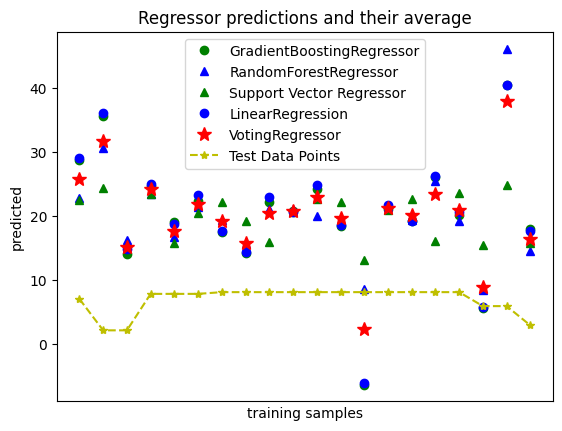

In [198]:
X_test = X_test[:20]
linear_reg.fit(X_train, y_train)
SVR_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)
voting_reg.fit(X_train, y_train)

pred_linear_reg = linear_reg.predict(X_test)
pred_svr_reg = SVR_reg.predict(X_test)
pred_xgb_reg = ridge_reg.predict(X_test)
pred_rf_reg = rf_reg.predict(X_test)
pred_voting_reg = voting_reg.predict(X_test)

plt.figure()
plt.plot(pred_xgb_reg, "go", label="GradientBoostingRegressor")
plt.plot(pred_rf_reg, "b^", label="RandomForestRegressor")
plt.plot(pred_svr_reg, "g^", label="Support Vector Regressor")
plt.plot(pred_linear_reg, "bo", label="LinearRegression")

plt.plot(pred_voting_reg, "r*", ms=10, label="VotingRegressor")
plt.plot( target[:20],"y*--", label = 'Test Data Points')

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()
